# 📦 물류데이터 시각화 (Bigcontest) 

## 📌 사용 라이브러리

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [8]:
df_shipping = pd.read_excel("./commerce.xlsx", encoding="cp949")

## 📌 테이블 정의서
#### 기본 정보
* 테이블명 : 일자별 행정동별 카테고리별 물류 건수
* 테이블 개요 : [적재주기:일단위] 기준지역 내 일자별 카테고리별 물류 건수

#### 특기사항
* 기간 : 19년 2월 1일 - 19년 5월 31일, 20년 2월 1일~20년 5월 31일
* 지역 : 대구(수성구, 중구), 서울(노원구, 중구) 내 전 행정동
* 카테고리별(대분류기준) 송장 건수


In [9]:
df_shipping.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


## 📌 데이터 전처리

In [10]:
df_shipping.columns

Index(['DL_YMD', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'CTPV_NM', 'CTPV_CD',
       'CTGG_NM', 'CTGG_CD', 'HDNG_NM', 'HDNG_CD', 'INVC_CONT'],
      dtype='object')

In [11]:
df_shipping.rename(columns={"DL_YMD":"배송년월일"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_NM":"배송상품대분류명"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_CD":"배송상품대분류코드"}, inplace=True)
df_shipping.rename(columns={"CTPV_NM":"시도명"}, inplace=True)
df_shipping.rename(columns={"CTPV_CD":"시도코드"}, inplace=True)
df_shipping.rename(columns={"CTGG_NM":"시군구명"}, inplace=True)
df_shipping.rename(columns={"CTGG_CD":"시군구코드"}, inplace=True)
df_shipping.rename(columns={"HDNG_NM":"행정동명"}, inplace=True)
df_shipping.rename(columns={"HDNG_CD":"행정동코드"}, inplace=True)
df_shipping.rename(columns={"INVC_CONT":"송장건수"}, inplace=True)

In [12]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [13]:
df = df_shipping.drop(['배송상품대분류코드', '시도코드', '시군구코드','행정동코드'], axis=1)
df

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수
0,190201,도서/음반,서울특별시,중구,동화동,16
1,190201,가구/인테리어,서울특별시,중구,신당동,4
2,190201,가구/인테리어,대구광역시,중구,성내1동,1
3,190201,도서/음반,대구광역시,중구,남산2동,6
4,190201,디지털/가전,대구광역시,수성구,고산3동,21
...,...,...,...,...,...,...
156566,200531,패션의류,대구광역시,수성구,범물2동,22
156567,200531,패션의류,서울특별시,중구,약수동,21
156568,200531,패션잡화,대구광역시,수성구,범물2동,14
156569,200531,패션잡화,서울특별시,노원구,상계6.7동,25


### 결측치 확인

In [14]:
df_shipping.isnull().sum()

배송년월일        0
배송상품대분류명     0
배송상품대분류코드    0
시도명          0
시도코드         0
시군구명         0
시군구코드        0
행정동명         0
행정동코드        0
송장건수         0
dtype: int64

### 배송년월일 날짜타입으로 변환

In [15]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   배송년월일      156571 non-null  int64 
 1   배송상품대분류명   156571 non-null  object
 2   배송상품대분류코드  156571 non-null  int64 
 3   시도명        156571 non-null  object
 4   시도코드       156571 non-null  int64 
 5   시군구명       156571 non-null  object
 6   시군구코드      156571 non-null  int64 
 7   행정동명       156571 non-null  object
 8   행정동코드      156571 non-null  int64 
 9   송장건수       156571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 11.9+ MB


In [16]:
df['배송날짜'] = df['배송년월일'] +20000000

In [17]:
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜
0,190201,도서/음반,서울특별시,중구,동화동,16,20190201
1,190201,가구/인테리어,서울특별시,중구,신당동,4,20190201
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,20190201
3,190201,도서/음반,대구광역시,중구,남산2동,6,20190201
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,20190201


In [18]:
df

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜
0,190201,도서/음반,서울특별시,중구,동화동,16,20190201
1,190201,가구/인테리어,서울특별시,중구,신당동,4,20190201
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,20190201
3,190201,도서/음반,대구광역시,중구,남산2동,6,20190201
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,20190201
...,...,...,...,...,...,...,...
156566,200531,패션의류,대구광역시,수성구,범물2동,22,20200531
156567,200531,패션의류,서울특별시,중구,약수동,21,20200531
156568,200531,패션잡화,대구광역시,수성구,범물2동,14,20200531
156569,200531,패션잡화,서울특별시,노원구,상계6.7동,25,20200531


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   배송년월일     156571 non-null  int64 
 1   배송상품대분류명  156571 non-null  object
 2   시도명       156571 non-null  object
 3   시군구명      156571 non-null  object
 4   행정동명      156571 non-null  object
 5   송장건수      156571 non-null  int64 
 6   배송날짜      156571 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.4+ MB


In [20]:
df['배송날짜'] = pd.to_datetime(df['배송날짜'], format='%Y%m%d')

In [21]:
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   배송년월일     156571 non-null  int64         
 1   배송상품대분류명  156571 non-null  object        
 2   시도명       156571 non-null  object        
 3   시군구명      156571 non-null  object        
 4   행정동명      156571 non-null  object        
 5   송장건수      156571 non-null  int64         
 6   배송날짜      156571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 8.4+ MB


### 배송날짜를 '배송연도'와 '배송 월'로 분리하기

In [23]:
import datetime

In [24]:
df['배송연도']=pd.DatetimeIndex(df['배송날짜']).year
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019


In [25]:
df['배송월']=pd.DatetimeIndex(df['배송날짜']).month
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2


In [26]:
df['배송일']=pd.DatetimeIndex(df['배송날짜']).day
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,1
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,1
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,1


### 시도명과 시군구명 합치기
* 서울특별시 중구와 대구광역시 중구의 혼란을 줄이기 위해, 시도명과 시군구명을 합쳐 '배송지역'컬럼을 형성한다.

In [27]:
df['배송지역']=df['시도명']+df['시군구명']

In [28]:
서울특별시중구 = df[df['배송지역'] =='서울특별시중구']
서울특별시중구

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구
...,...,...,...,...,...,...,...,...,...,...,...
156556,200531,화장품/미용,서울특별시,중구,필동,8,2020-05-31,2020,5,31,서울특별시중구
156558,200531,패션잡화,서울특별시,중구,장충동,5,2020-05-31,2020,5,31,서울특별시중구
156561,200531,화장품/미용,서울특별시,중구,다산동,15,2020-05-31,2020,5,31,서울특별시중구
156563,200531,패션잡화,서울특별시,중구,명동,9,2020-05-31,2020,5,31,서울특별시중구


In [29]:
대구광역시중구 = df[df['배송지역'] =='대구광역시중구']
대구광역시중구

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,1,대구광역시중구
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,1,대구광역시중구
8,190201,가구/인테리어,대구광역시,중구,남산4동,2,2019-02-01,2019,2,1,대구광역시중구
9,190201,디지털/가전,대구광역시,중구,대신동,7,2019-02-01,2019,2,1,대구광역시중구
21,190201,도서/음반,대구광역시,중구,대봉2동,4,2019-02-01,2019,2,1,대구광역시중구
...,...,...,...,...,...,...,...,...,...,...,...
156534,200531,화장품/미용,대구광역시,중구,동인동,13,2020-05-31,2020,5,31,대구광역시중구
156535,200531,패션잡화,대구광역시,중구,삼덕동,6,2020-05-31,2020,5,31,대구광역시중구
156537,200531,출산/육아,대구광역시,중구,남산4동,1,2020-05-31,2020,5,31,대구광역시중구
156545,200531,패션의류,대구광역시,중구,성내2동,8,2020-05-31,2020,5,31,대구광역시중구


# 📌 확인하고 싶은 데이터 리스트 정리
* 날짜별 배송건수 추이 
* 지역별 날짜에 따른 배송건수 추이
* 날짜에 따른 배송상품대분류별 배송건수 추이
* 지역별 배송상품대분류별 배송건수 차이 / 대구와 서울의 배송상품분류 별 송장건수 차이
* 품목별 매출 신장률

# 📌 데이터 시각화

In [30]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

In [31]:
# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [32]:
#레전드 박스 plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

## 대구 vs 서울 비교

In [33]:
df_seoul = df[df['시도명']=='서울특별시']

In [34]:
df_seoul.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구


In [35]:
df_daegu = df[df['시도명']=='대구광역시']

In [36]:
df_daegu.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,1,대구광역시중구
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,1,대구광역시중구
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,1,대구광역시수성구
6,190201,가구/인테리어,대구광역시,수성구,범어1동,6,2019-02-01,2019,2,1,대구광역시수성구
8,190201,가구/인테리어,대구광역시,중구,남산4동,2,2019-02-01,2019,2,1,대구광역시중구


### 1. 배송상품대분류 별 송장건수

* `대구`현황

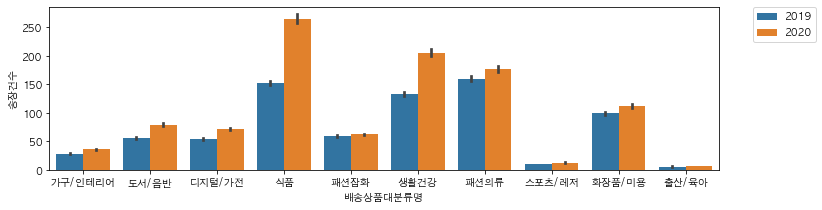

In [37]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_daegu, x="배송상품대분류명", y="송장건수", hue="배송연도")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

* `서울`현황

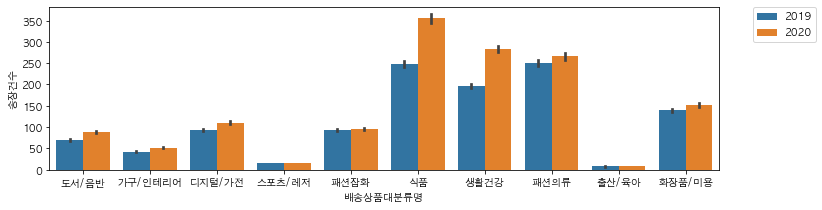

In [38]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="배송연도")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

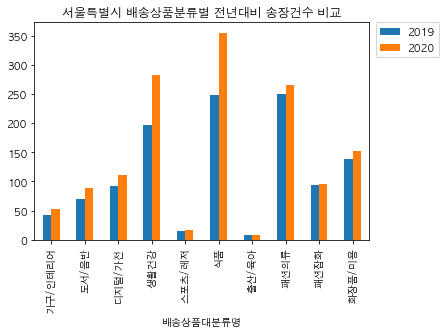

In [39]:
s = pd.pivot_table(df_seoul, index=["배송상품대분류명"], values="송장건수", columns="배송연도").plot.bar()
s.plot(rot=50, figsize=(10,5))
plt.title("서울특별시 배송상품분류별 전년대비 송장건수 비교")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

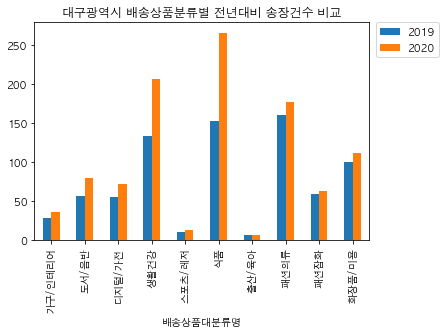

In [40]:
s = pd.pivot_table(df_daegu, index=["배송상품대분류명"], values="송장건수", columns="배송연도").plot.bar()
s.plot(rot=50, figsize=(10,5))
plt.title("대구광역시 배송상품분류별 전년대비 송장건수 비교")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

### 생활건강, 스포츠레저 

### 서울 중구 & 노원구 비교

In [41]:
서울중구 = df[df['배송지역'] == '서울특별시중구']
서울중구.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구


In [42]:
df1 = 서울중구.pivot_table(index=["배송상품대분류명", "배송연도"], values="송장건수").round()
df1

송장건수
배송상품대분류명 배송연도       
가구/인테리어  2019   36.0
         2020   40.0
도서/음반    2019   63.0
         2020   72.0
디지털/가전   2019   84.0
         2020   95.0
생활건강     2019  162.0
         2020  217.0
스포츠/레저   2019   14.0
         2020   14.0
식품       2019  196.0
         2020  262.0
출산/육아    2019    5.0
         2020    5.0
패션의류     2019  195.0
         2020  195.0
패션잡화     2019   80.0
         2020   82.0
화장품/미용   2019  108.0
         2020  113.0

In [43]:
df1.copy()

송장건수
배송상품대분류명 배송연도       
가구/인테리어  2019   36.0
         2020   40.0
도서/음반    2019   63.0
         2020   72.0
디지털/가전   2019   84.0
         2020   95.0
생활건강     2019  162.0
         2020  217.0
스포츠/레저   2019   14.0
         2020   14.0
식품       2019  196.0
         2020  262.0
출산/육아    2019    5.0
         2020    5.0
패션의류     2019  195.0
         2020  195.0
패션잡화     2019   80.0
         2020   82.0
화장품/미용   2019  108.0
         2020  113.0

In [44]:
서울중구

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구
...,...,...,...,...,...,...,...,...,...,...,...
156556,200531,화장품/미용,서울특별시,중구,필동,8,2020-05-31,2020,5,31,서울특별시중구
156558,200531,패션잡화,서울특별시,중구,장충동,5,2020-05-31,2020,5,31,서울특별시중구
156561,200531,화장품/미용,서울특별시,중구,다산동,15,2020-05-31,2020,5,31,서울특별시중구
156563,200531,패션잡화,서울특별시,중구,명동,9,2020-05-31,2020,5,31,서울특별시중구


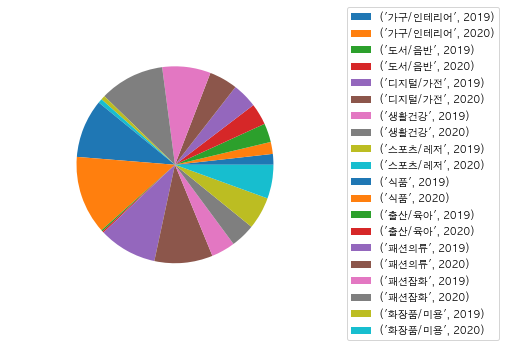

In [46]:
plt.pie(df1)
plt.axis('equal')
plt.legend(df1.index, bbox_to_anchor=(1.0,1.0,0.25,0.25))
plt.show()


In [47]:
서울노원구 = df[df['배송지역'] == '서울특별시노원구']
서울노원구.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
15,190201,디지털/가전,서울특별시,노원구,상계10동,8,2019-02-01,2019,2,1,서울특별시노원구
16,190201,도서/음반,서울특별시,노원구,상계8동,32,2019-02-01,2019,2,1,서울특별시노원구
18,190201,도서/음반,서울특별시,노원구,상계9동,27,2019-02-01,2019,2,1,서울특별시노원구
20,190201,도서/음반,서울특별시,노원구,월계1동,38,2019-02-01,2019,2,1,서울특별시노원구
23,190201,가구/인테리어,서울특별시,노원구,공릉1동,8,2019-02-01,2019,2,1,서울특별시노원구


In [48]:
df2= 서울노원구.pivot_table(index=["배송상품대분류명", "배송연도"], values="송장건수").round()
df2

송장건수
배송상품대분류명 배송연도       
가구/인테리어  2019   47.0
         2020   61.0
도서/음반    2019   75.0
         2020  101.0
디지털/가전   2019   99.0
         2020  123.0
생활건강     2019  223.0
         2020  336.0
스포츠/레저   2019   16.0
         2020   18.0
식품       2019  289.0
         2020  428.0
출산/육아    2019   10.0
         2020   11.0
패션의류     2019  294.0
         2020  322.0
패션잡화     2019  104.0
         2020  106.0
화장품/미용   2019  163.0
         2020  183.0

In [49]:
result = pd.merge(df1, df2, on=['배송상품대분류명', '배송연도'], suffixes=('_중구', '_노원구'))
result

송장건수_중구  송장건수_노원구
배송상품대분류명 배송연도                   
가구/인테리어  2019     36.0      47.0
         2020     40.0      61.0
도서/음반    2019     63.0      75.0
         2020     72.0     101.0
디지털/가전   2019     84.0      99.0
         2020     95.0     123.0
생활건강     2019    162.0     223.0
         2020    217.0     336.0
스포츠/레저   2019     14.0      16.0
         2020     14.0      18.0
식품       2019    196.0     289.0
         2020    262.0     428.0
출산/육아    2019      5.0      10.0
         2020      5.0      11.0
패션의류     2019    195.0     294.0
         2020    195.0     322.0
패션잡화     2019     80.0     104.0
         2020     82.0     106.0
화장품/미용   2019    108.0     163.0
         2020    113.0     183.0

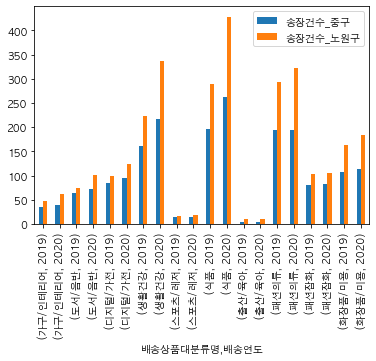

In [50]:
result.plot(kind='bar')

흠..이상해.....

In [51]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('가구/인테리어', 2019) to ('화장품/미용', 2020)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   송장건수_중구   20 non-null     float64
 1   송장건수_노원구  20 non-null     float64
dtypes: float64(2)
memory usage: 628.0+ bytes


<Figure size 1440x216 with 0 Axes>

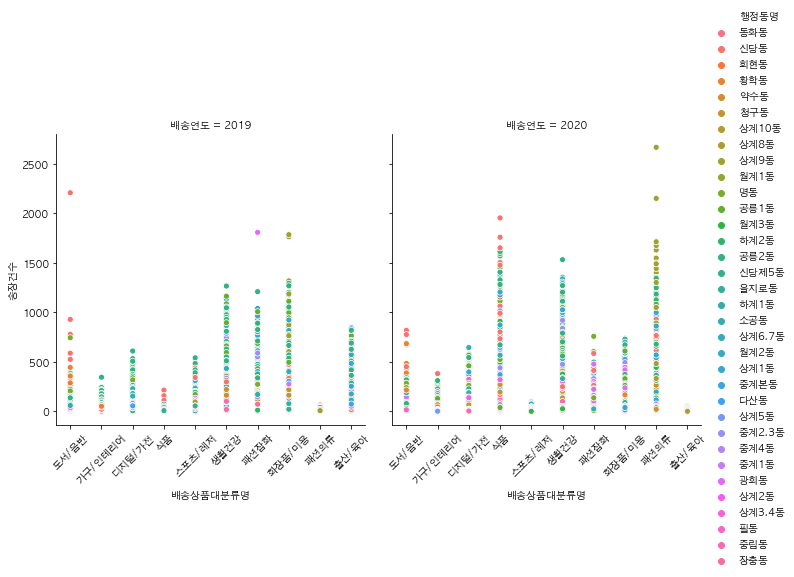

In [52]:
plt.figure(figsize=(20,3))
chart_seoul= sns.relplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="행정동명", kind='scatter', col='배송연도')
chart_seoul.set_xticklabels(rotation=45)

<Figure size 1440x216 with 0 Axes>

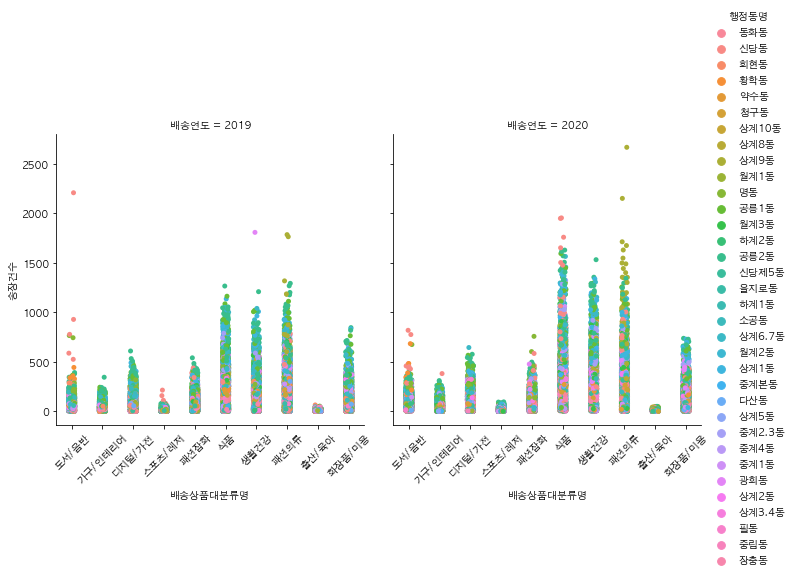

In [53]:
plt.figure(figsize=(20,3))
cat_seoul=sns.catplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="행정동명", col='배송연도')
cat_seoul.set_xticklabels(rotation=45)

In [54]:
df_seoul

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구
...,...,...,...,...,...,...,...,...,...,...,...
156563,200531,패션잡화,서울특별시,중구,명동,9,2020-05-31,2020,5,31,서울특별시중구
156564,200531,화장품/미용,서울특별시,노원구,상계1동,39,2020-05-31,2020,5,31,서울특별시노원구
156565,200531,출산/육아,서울특별시,노원구,상계10동,1,2020-05-31,2020,5,31,서울특별시노원구
156567,200531,패션의류,서울특별시,중구,약수동,21,2020-05-31,2020,5,31,서울특별시중구


<Figure size 1440x216 with 0 Axes>

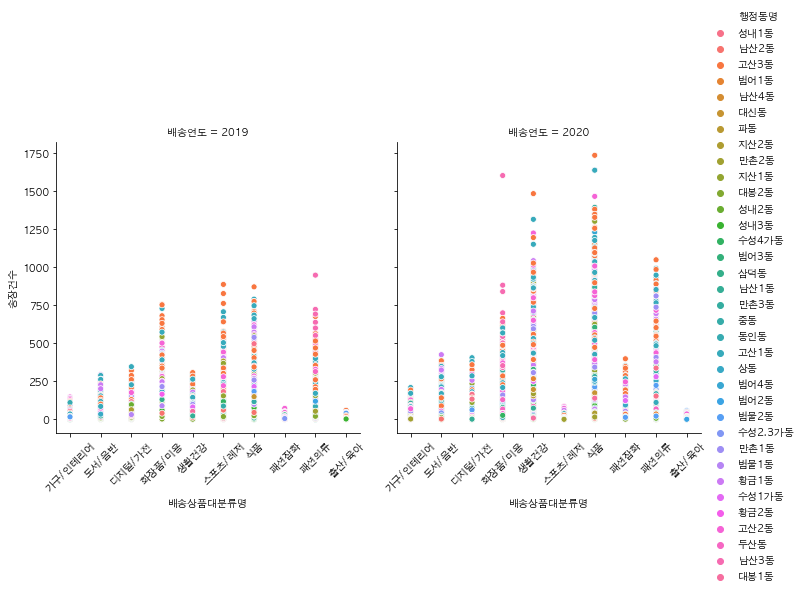

In [55]:
plt.figure(figsize=(20,3))
chart_daegu= sns.relplot(data=df_daegu, x="배송상품대분류명", y="송장건수", hue="행정동명", kind='scatter', col='배송연도')
chart_daegu.set_xticklabels(rotation=45)

In [58]:
df_last= df[df["배송연도"]==2019]
df_last

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,1,대구광역시중구
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,1,대구광역시중구
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,1,대구광역시수성구
...,...,...,...,...,...,...,...,...,...,...,...
76887,190531,패션잡화,서울특별시,중구,청구동,55,2019-05-31,2019,5,31,서울특별시중구
76888,190531,화장품/미용,대구광역시,수성구,범어2동,120,2019-05-31,2019,5,31,대구광역시수성구
76889,190531,화장품/미용,서울특별시,중구,다산동,74,2019-05-31,2019,5,31,서울특별시중구
76890,190531,패션의류,대구광역시,중구,대신동,150,2019-05-31,2019,5,31,대구광역시중구


In [59]:
df_first= df[df["배송연도"]==2020]
df_first

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
76892,200201,가구/인테리어,대구광역시,수성구,범어3동,3,2020-02-01,2020,2,1,대구광역시수성구
76893,200201,도서/음반,서울특별시,노원구,월계1동,24,2020-02-01,2020,2,1,서울특별시노원구
76894,200201,가구/인테리어,대구광역시,수성구,범물2동,3,2020-02-01,2020,2,1,대구광역시수성구
76895,200201,가구/인테리어,서울특별시,노원구,상계3.4동,4,2020-02-01,2020,2,1,서울특별시노원구
76896,200201,도서/음반,대구광역시,수성구,수성1가동,34,2020-02-01,2020,2,1,대구광역시수성구
...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,대구광역시,수성구,범물2동,22,2020-05-31,2020,5,31,대구광역시수성구
156567,200531,패션의류,서울특별시,중구,약수동,21,2020-05-31,2020,5,31,서울특별시중구
156568,200531,패션잡화,대구광역시,수성구,범물2동,14,2020-05-31,2020,5,31,대구광역시수성구
156569,200531,패션잡화,서울특별시,노원구,상계6.7동,25,2020-05-31,2020,5,31,서울특별시노원구


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

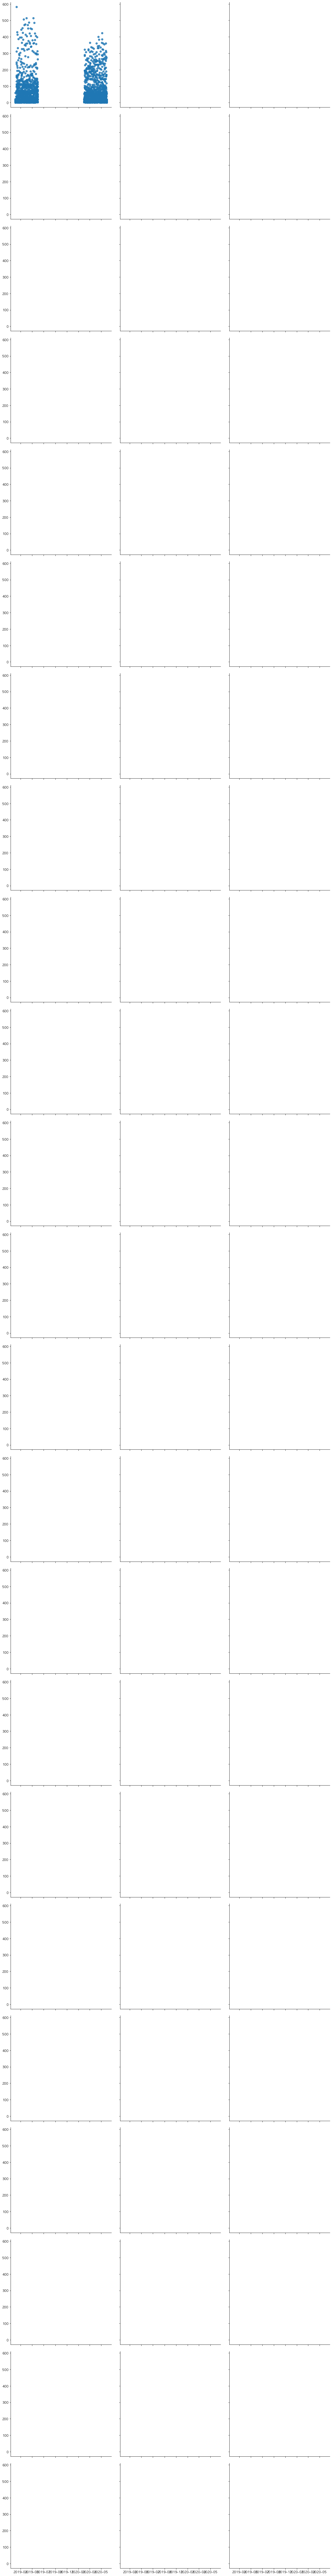

In [60]:
sns.lmplot(data=df, x="배송날짜", y="송장건수", col="행정동명", col_wrap=3)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   배송년월일     156571 non-null  int64         
 1   배송상품대분류명  156571 non-null  object        
 2   시도명       156571 non-null  object        
 3   시군구명      156571 non-null  object        
 4   행정동명      156571 non-null  object        
 5   송장건수      156571 non-null  int64         
 6   배송날짜      156571 non-null  datetime64[ns]
 7   배송연도      156571 non-null  int64         
 8   배송월       156571 non-null  int64         
 9   배송일       156571 non-null  int64         
 10  배송지역      156571 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 13.1+ MB


In [62]:
t = pd.pivot_table(df, index='배송상품대분류명', columns='행정동명', values='송장건수').round()
t

행정동명,고산1동,고산2동,고산3동,공릉1동,공릉2동,광희동,남산1동,남산2동,남산3동,남산4동,...,지산2동,청구동,파동,필동,하계1동,하계2동,황금1동,황금2동,황학동,회현동
배송상품대분류명,,,,,,,,,,,,,,,,,,,,,
가구/인테리어,56.0,55.0,62.0,90.0,101.0,52.0,14.0,11.0,15.0,22.0,...,33.0,32.0,23.0,26.0,52.0,41.0,44.0,32.0,46.0,44.0
도서/음반,159.0,132.0,154.0,116.0,184.0,60.0,22.0,18.0,25.0,40.0,...,62.0,48.0,41.0,66.0,95.0,85.0,157.0,40.0,75.0,74.0
디지털/가전,117.0,110.0,121.0,178.0,201.0,122.0,30.0,23.0,27.0,44.0,...,66.0,58.0,46.0,82.0,110.0,91.0,93.0,63.0,85.0,131.0
생활건강,315.0,289.0,343.0,425.0,458.0,239.0,70.0,59.0,78.0,119.0,...,184.0,150.0,129.0,130.0,258.0,215.0,251.0,163.0,219.0,266.0
스포츠/레저,21.0,22.0,22.0,26.0,32.0,27.0,6.0,4.0,5.0,7.0,...,12.0,9.0,9.0,10.0,17.0,13.0,18.0,11.0,13.0,17.0
식품,403.0,360.0,428.0,528.0,577.0,280.0,77.0,63.0,93.0,150.0,...,252.0,214.0,173.0,154.0,357.0,281.0,337.0,184.0,239.0,284.0
출산/육아,9.0,10.0,17.0,14.0,15.0,4.0,2.0,2.0,4.0,6.0,...,6.0,6.0,7.0,3.0,8.0,7.0,8.0,4.0,8.0,5.0
패션의류,334.0,273.0,359.0,452.0,485.0,367.0,58.0,45.0,71.0,107.0,...,193.0,183.0,133.0,84.0,304.0,225.0,267.0,158.0,240.0,160.0
패션잡화,116.0,98.0,126.0,165.0,184.0,121.0,22.0,18.0,25.0,38.0,...,66.0,55.0,44.0,38.0,108.0,81.0,91.0,67.0,91.0,111.0


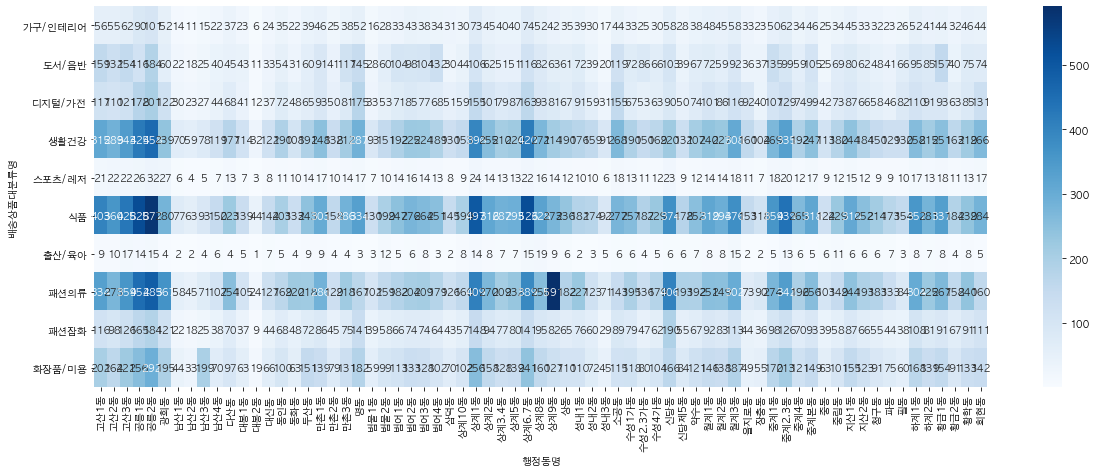

In [63]:
plt.figure(figsize=(20,7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

# 📌 2020.10.16-17 분석

# 1. 서울과 대구 배송상품대분류별 증감 차이

In [64]:
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,1,대구광역시중구
3,190201,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,1,대구광역시중구
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,1,대구광역시수성구


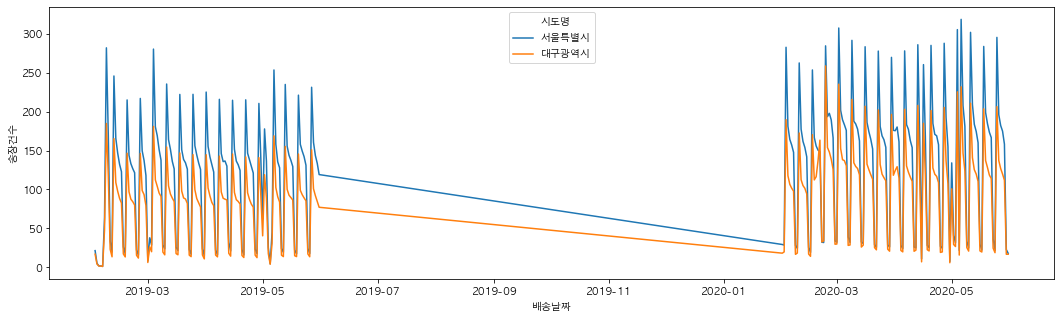

In [65]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송날짜', y='송장건수', data=df, hue='시도명', ci=None)

* 작년올해 통틀어서, 대구가 서울 수준에 달할 정도로 전체 송장건수가 급증한 시점이 한 곳 있는데, 신천지발 코로나(2/18) 직후에 치솟았다.

## 📍2019년 2-5월, 2020년 2-5월 데이터 분리하기

In [99]:
df_time = df.set_index("배송날짜")

In [100]:
df_time

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송연도,배송월,배송일,배송지역
배송날짜,,,,,,,,,,
2019-02-01,190201,도서/음반,서울특별시,중구,동화동,16,2019,2,1,서울특별시중구
2019-02-01,190201,가구/인테리어,서울특별시,중구,신당동,4,2019,2,1,서울특별시중구
2019-02-01,190201,가구/인테리어,대구광역시,중구,성내1동,1,2019,2,1,대구광역시중구
2019-02-01,190201,도서/음반,대구광역시,중구,남산2동,6,2019,2,1,대구광역시중구
2019-02-01,190201,디지털/가전,대구광역시,수성구,고산3동,21,2019,2,1,대구광역시수성구
...,...,...,...,...,...,...,...,...,...,...
2020-05-31,200531,패션의류,대구광역시,수성구,범물2동,22,2020,5,31,대구광역시수성구
2020-05-31,200531,패션의류,서울특별시,중구,약수동,21,2020,5,31,서울특별시중구
2020-05-31,200531,패션잡화,대구광역시,수성구,범물2동,14,2020,5,31,대구광역시수성구


In [101]:
df_time.index

DatetimeIndex(['2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01',
               '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01',
               '2019-02-01', '2019-02-01',
               ...
               '2020-05-31', '2020-05-31', '2020-05-31', '2020-05-31',
               '2020-05-31', '2020-05-31', '2020-05-31', '2020-05-31',
               '2020-05-31', '2020-05-31'],
              dtype='datetime64[ns]', name='배송날짜', length=156571, freq=None)

In [104]:
shipping_last = df_time["2019-02-01":"2019-05-31"]
shipping_this = df_time["2020-02-01":"2020-05-31"]

## 📍2019년 전국 날짜 별 송장건수 추이

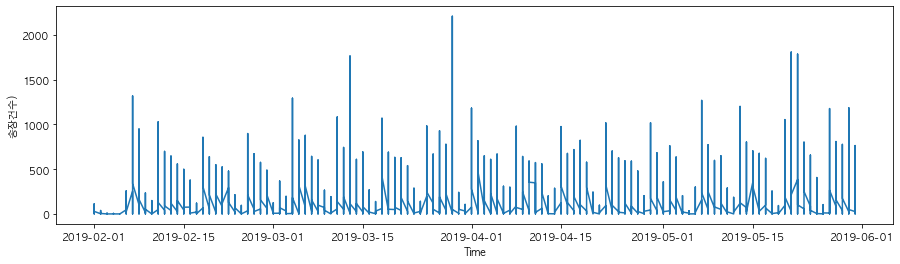

In [138]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(shipping_last.index, shipping_last['송장건수'])
ax.set_xlabel('Time')
ax.set_ylabel('송장건수)')
plt.show()

## 📍2019년 서울/대구 날짜 별 송장건수 추이 비교

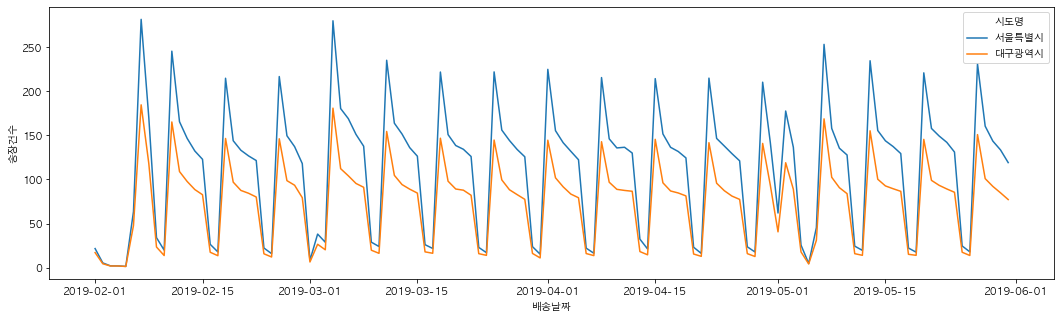

In [165]:
plt.figure(figsize=(18,5))
sns.lineplot(x=shipping_last.index, y='송장건수', data=shipping_last, hue='시도명', ci=None)

* `Check point`
2019년 5월1일 전후 

## 📍2020년 전국 날짜 별 송장건수 비교

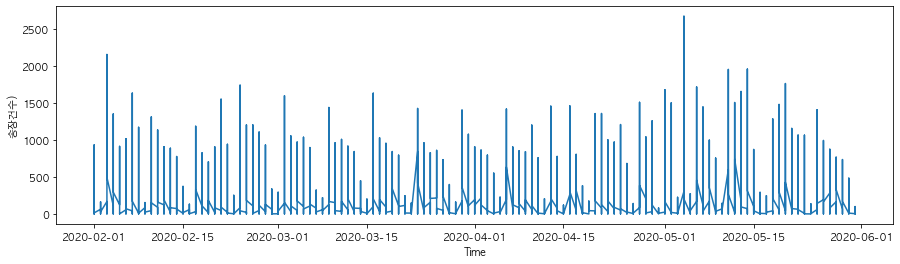

In [135]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(shipping_this.index, shipping_this['송장건수'])
ax.set_xlabel('Time')
ax.set_ylabel('송장건수)')
plt.show()

* `Check point`
2019년 5월1일 직후 

## 📍2020년 서울/대구 날짜 별 송장건수 추이 비교

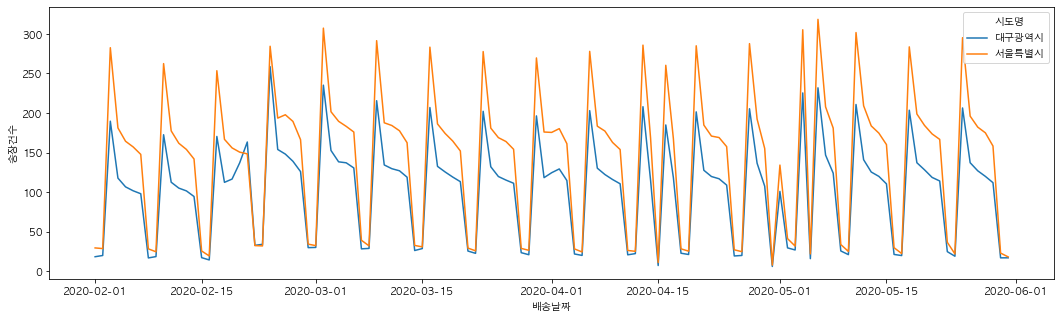

In [161]:
plt.figure(figsize=(18,5))
sns.lineplot(x=shipping_this.index, y='송장건수', data=shipping_this, hue='시도명', ci=None)

`Check point`
* 1)  3번째 봉우리 '대구'  
* 2)  2020년 4월 15일 전후 봉우리 2개
* 3)  2020년 5월1일-15일 사이 최고점 찍은 우리 2개


`뉴스`
1. 4월3일 행정안전부 _ 긴급재난지원금 지급 관련 브리핑

## 📍특정 기간 확대해서 살펴보기

### 1) 2020년 2월 15일~3월 1일 대구

In [162]:
feb_zoom = df_time["2020-02-15":"2020-03-01"]

In [163]:
feb_daegu = feb_zoom[feb_zoom['시도명']=='대구광역시']

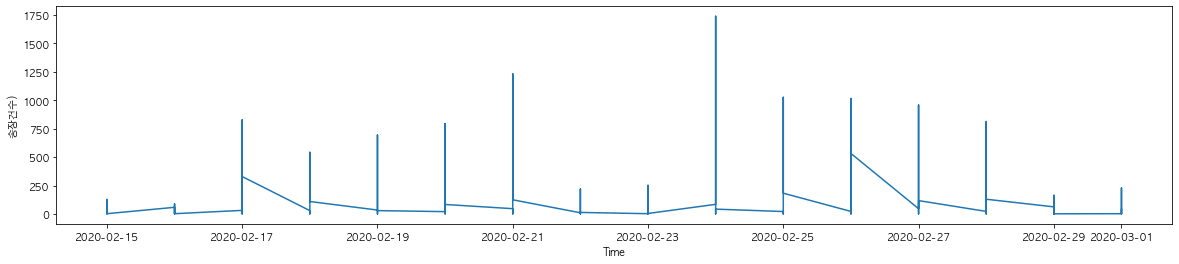

In [175]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(feb_daegu.index, feb_daegu['송장건수'])
ax.set_xlabel('Time')
ax.set_ylabel('송장건수)')
plt.show()

* `Check point`
* 2월 18일 신천지 확산
* 2월20일 국내 첫 사망자 발생
* 2월 24일

### 2) 2020년 2월 23일 ~ 25일 대구 배송상품군별 송장건수 

In [183]:
feb24 = df_time["2020-02-23":"2020-02-25"]
feb24_daegu = feb24[feb24['시도명'] =='대구광역시']

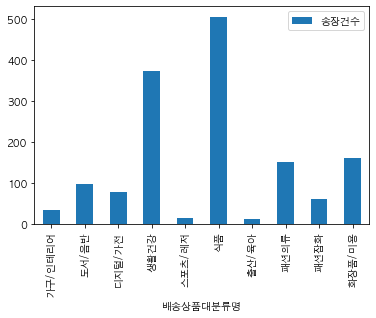

In [192]:
fd24 = pd.pivot_table(feb24_daegu, index=['배송상품대분류명'], values=["송장건수"])
fd24.plot(kind="bar")

### 3) 2020년 5월1일~5월15일 서울

In [139]:
shipping_zoom = df_time["2020-05-01":"2020-05-15"]

In [152]:
s20 = shipping_zoom[shipping_zoom['시도명']=='서울특별시']

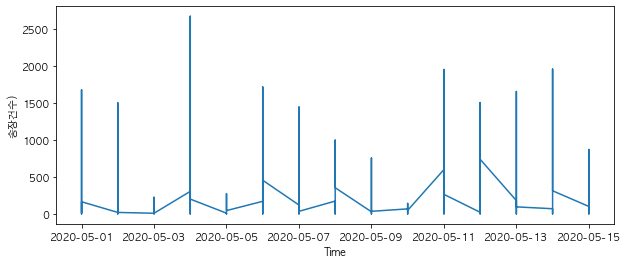

In [141]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(shipping_zoom.index, shipping_zoom['송장건수'])
ax.set_xlabel('Time')
ax.set_ylabel('송장건수)')
plt.show()

#### 코로나 이태원 사태
* 이태원발 코로나 (노출일자: 4.24 ~ 5.6)/이태원 클럽발 확진자 5월 4~8일 & 10일 정점 이후 조금씩 감소 추세 -> 이태원 클럽 관련 첫 언론 발표일자: 5월8일 질병관리본부 정례브리핑


#### 5월 9일 기준
* 신규환자: 18명, 격리해제는 84명 증가, 전체적으로 격리 중 환자는 감소 
* 서울) 격리중 - 111명, 격리해제-536명, 사망-2명, 합계 649명
* 대구) 격리중-375명, 격리해제-6,306명, 사망 -178명, 합계-6,859명

#### 서울 카테고리별 송장건수 

In [105]:
df_seoul19 = df_seoul[df_seoul['배송연도'] == 2019].copy()
df_seoul20 = df_seoul[df_seoul['배송연도'] == 2020].copy()

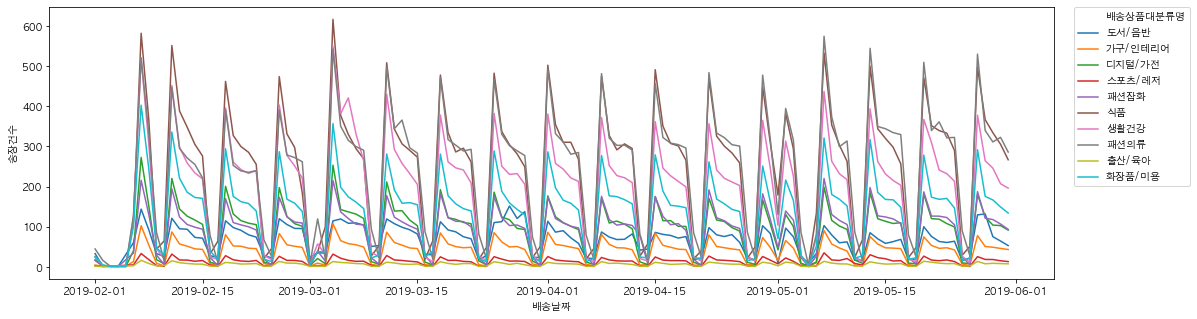

In [258]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송날짜', y='송장건수', data=df_seoul19, hue='배송상품대분류명', ci=None)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

In [260]:
df_seoul_time = df_seoul.set_index("배송날짜")

In [261]:
df_seoul_time 

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송연도,배송월,배송일,배송지역
배송날짜,,,,,,,,,,
2019-02-01,190201,도서/음반,서울특별시,중구,동화동,16,2019,2,1,서울특별시중구
2019-02-01,190201,가구/인테리어,서울특별시,중구,신당동,4,2019,2,1,서울특별시중구
2019-02-01,190201,도서/음반,서울특별시,중구,회현동,25,2019,2,1,서울특별시중구
2019-02-01,190201,디지털/가전,서울특별시,중구,황학동,14,2019,2,1,서울특별시중구
2019-02-01,190201,가구/인테리어,서울특별시,중구,약수동,4,2019,2,1,서울특별시중구
...,...,...,...,...,...,...,...,...,...,...
2020-05-31,200531,패션잡화,서울특별시,중구,명동,9,2020,5,31,서울특별시중구
2020-05-31,200531,화장품/미용,서울특별시,노원구,상계1동,39,2020,5,31,서울특별시노원구
2020-05-31,200531,출산/육아,서울특별시,노원구,상계10동,1,2020,5,31,서울특별시노원구


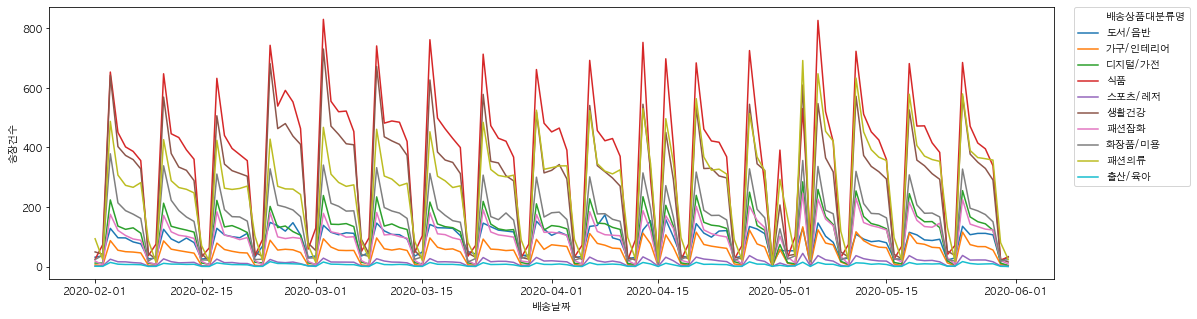

In [107]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송날짜', y='송장건수', data=df_seoul20, hue='배송상품대분류명', ci=None)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

In [262]:
s_time1 = df_time["2020-04-10":"2020-04-20"]
s_time2 = df_time["2020-04-20":"2020-05-10"]

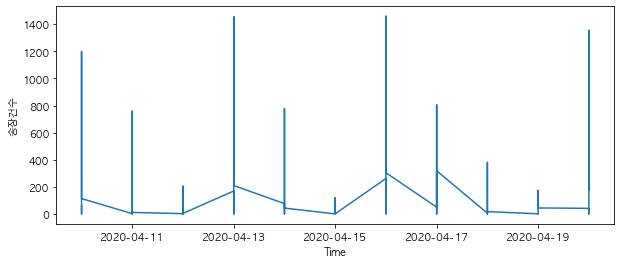

In [265]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(s_time1.index, s_time1['송장건수'])
ax.set_xlabel('Time')
ax.set_ylabel('송장건수')
plt.show()

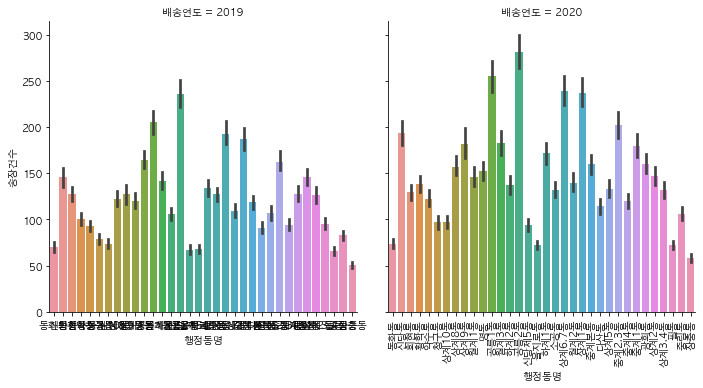

In [319]:
fig.set_size_inches(20, 8)
sns.catplot(data=df_seoul, x="행정동명", y="송장건수", kind="bar", col="배송연도", col_wrap=2)
plt.xticks(rotation=90)
plt.show()

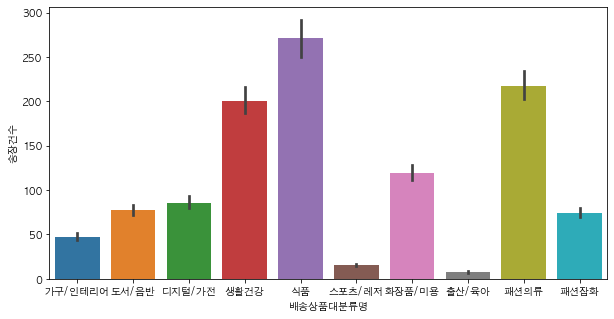

In [292]:
plt.figure(figsize=(10, 5))
sns.barplot(data=s_time1, x="배송상품대분류명", y="송장건수")

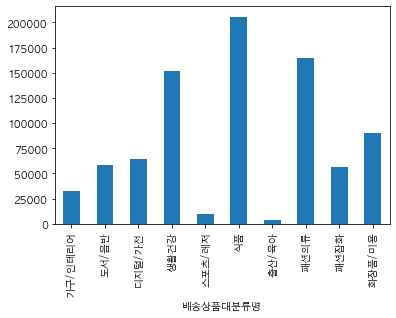

In [332]:
s_time1.groupby(['배송상품대분류명'])['송장건수'].sum().plot(kind="bar")

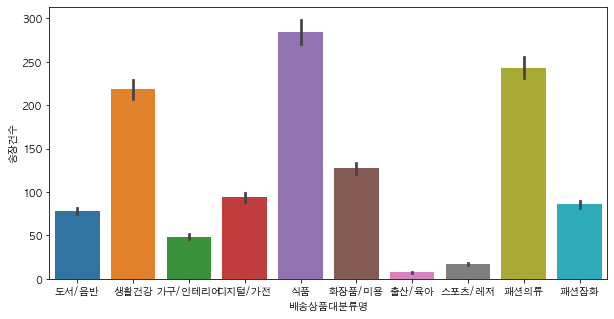

In [272]:
plt.figure(figsize=(10, 5))
sns.barplot(data=s_time2, x="배송상품대분류명", y="송장건수")

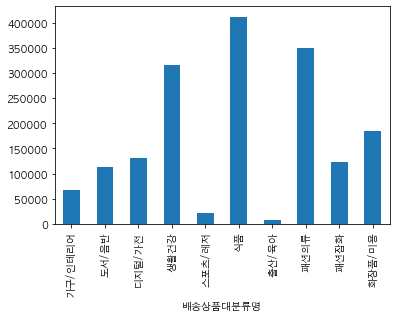

In [334]:
s_time2.groupby(['배송상품대분류명'])['송장건수'].sum().plot(kind="bar")

### 서울 행정동별 주문 건수 비교

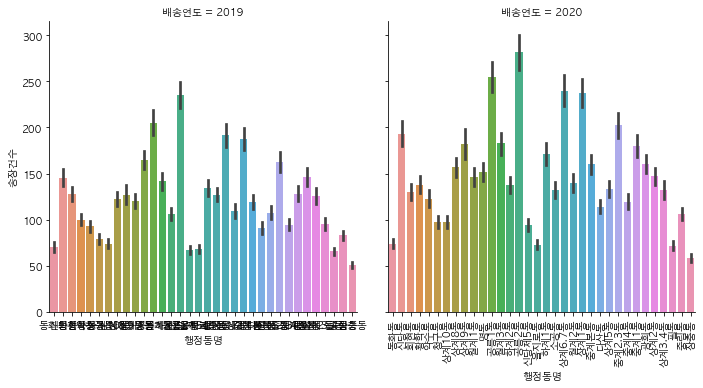

In [244]:
fig.set_size_inches(20, 8)
sns.catplot(data=df_seoul, x="행정동명", y="송장건수", kind="bar", col="배송연도", col_wrap=2)
plt.xticks(rotation=90)
plt.show()

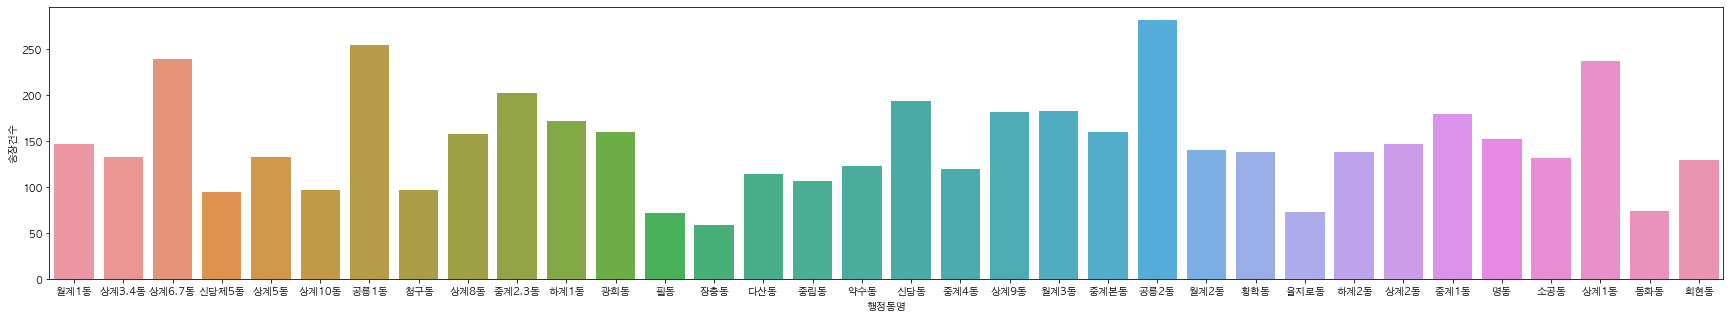

In [200]:
plt.figure(figsize=(18,5))
sns.barplot(x='행정동명', y='송장건수', data=df_seoul20, ci=None)
# plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

### 대구 행정동별 송장건수 비교

<Figure size 1440x360 with 0 Axes>

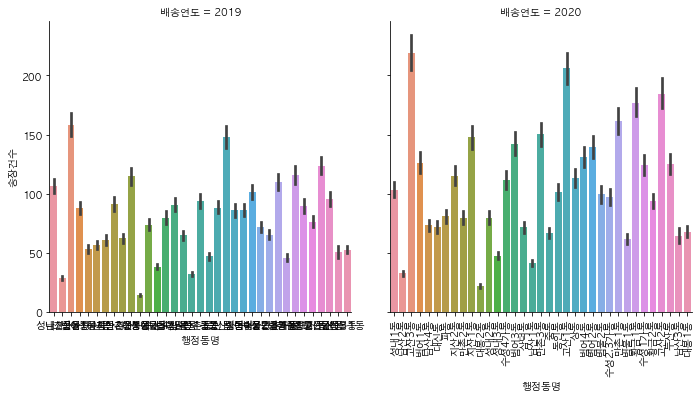

In [243]:
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.catplot(data=df_daegu, x="행정동명", y="송장건수", kind="bar", col="배송연도", col_wrap=2)
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x360 with 0 Axes>

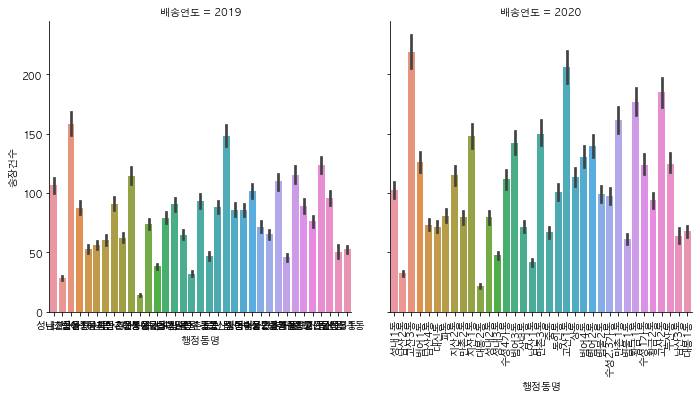

In [246]:
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.catplot(data=df_daegu, x="행정동명", y="송장건수", kind="bar", col="배송연도",  col_wrap=2)
plt.xticks(rotation=90)
plt.show()

송장건수가 가장 많이 증가한 '고산3동'은 대구에서 세대수/인구수가 가장 많은 지역이다.

### 대구 카테고리별 송장건수

In [109]:
df_daegu19 = df_daegu[df_daegu['배송연도'] == 2019].copy()
df_daegu20 = df_daegu[df_daegu['배송연도'] == 2020].copy()

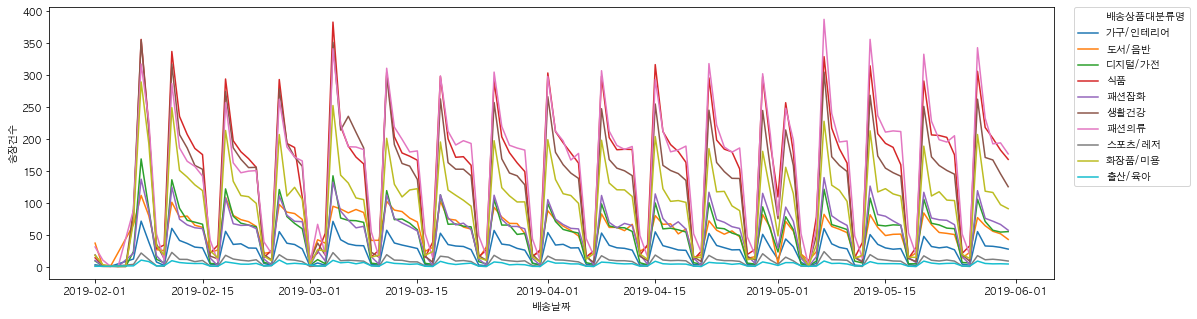

In [110]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송날짜', y='송장건수', data=df_daegu19, hue='배송상품대분류명', ci=None)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

In [112]:
df_daegu_shipping = df[['배송월', '배송일', '송장건수','배송연도']].copy()
df_daegu_shipping

,배송월,배송일,송장건수,배송연도
0,2,1,16,2019
1,2,1,4,2019
2,2,1,1,2019
3,2,1,6,2019
4,2,1,21,2019
...,...,...,...,...
156566,5,31,22,2020
156567,5,31,21,2020
156568,5,31,14,2020
156569,5,31,25,2020


In [113]:
df_daegu_shipping19 = df_daegu_shipping[df_daegu_shipping['배송연도'] == 2019]
df_daegu_shipping20 = df_daegu_shipping[df_daegu_shipping['배송연도'] == 2020]

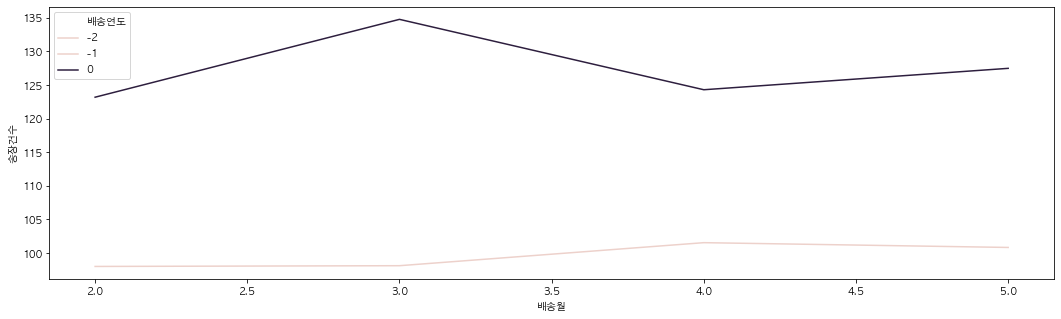

In [114]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송월', y='송장건수', data=df_daegu_shipping, hue='배송연도', ci=None)

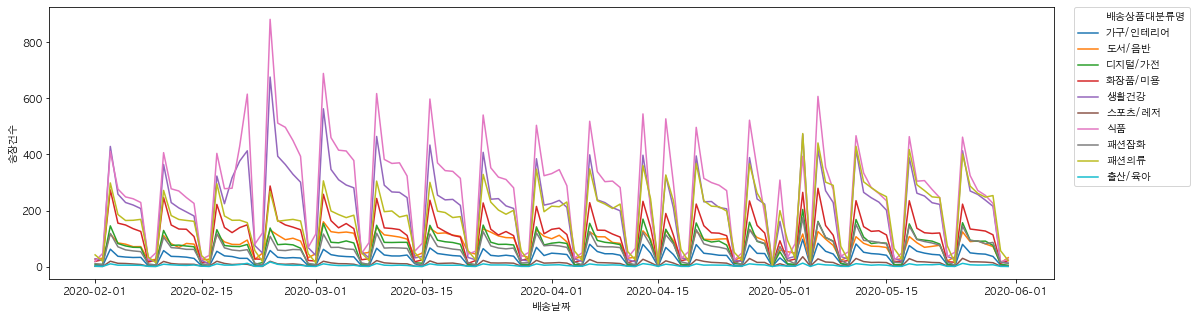

In [115]:
plt.figure(figsize=(18,5))
sns.lineplot(x='배송날짜', y='송장건수', data=df_daegu20, hue='배송상품대분류명', ci=None)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

#### ⇢ 신천지뉴스 직후 급증한 항목은 '식품'이다. 코로나에 대한 불안감으로, 식품에 대한 온라인 구매량이 늘어났다.

# 2. 서울 중구와 노원구 송장건수 전년대비 증감률 비교
### ⇢ 중구: 19%, 노원구 31% 증가

### 1) 중구 송장건수 증감률 계산

In [116]:
# junggu2019 = df[(df['배송지역']=='서울특별시중구') & (df['배송연도'] == 2019)]['송장건수'].value_counts()
j19 = df[(df['배송지역'] =='서울특별시중구') & (df['배송연도'] == 2019)]['송장건수'].sum()
j19

1646201

In [117]:
j20 = df[(df['배송지역'] =='서울특별시중구') & (df['배송연도'] == 2020)]['송장건수'].sum()
j20

1973815

In [118]:
#서울특별시 중구 송장건수 전년대비 증감률
j = (j20 - j19)/j19 * 100
j

19.90121497921578

In [119]:
junggu2019 = df[(df['배송지역'] =='서울특별시중구') & (df['배송연도'] == 2019)].copy()
junggu2019.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송일,배송지역
0,190201,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,1,서울특별시중구
1,190201,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,1,서울특별시중구
5,190201,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,1,서울특별시중구
7,190201,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,1,서울특별시중구
13,190201,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,1,서울특별시중구


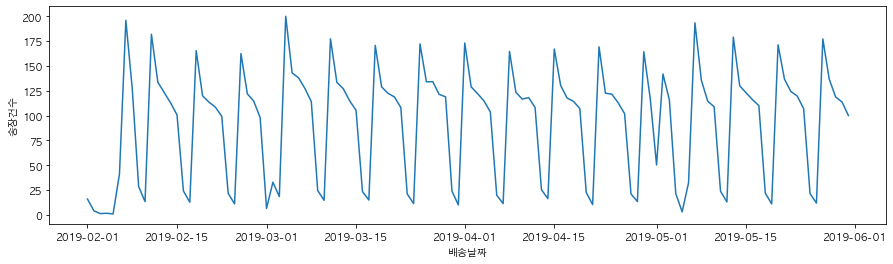

In [120]:
plt.figure(figsize=(15,4))
sns.lineplot(x="배송날짜", y="송장건수", data=junggu2019, ci=None)
# plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

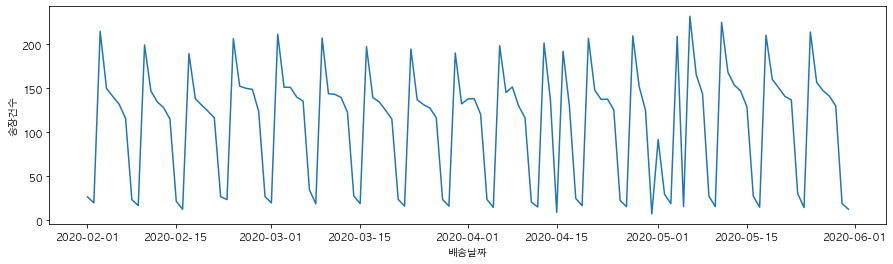

In [121]:
junggu2020 = df[(df['배송지역']=='서울특별시중구') & (df['배송연도'] == 2020)].copy()
plt.figure(figsize=(15,4))
sns.lineplot(x="배송날짜", y="송장건수", data=junggu2020, ci=None)
# plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

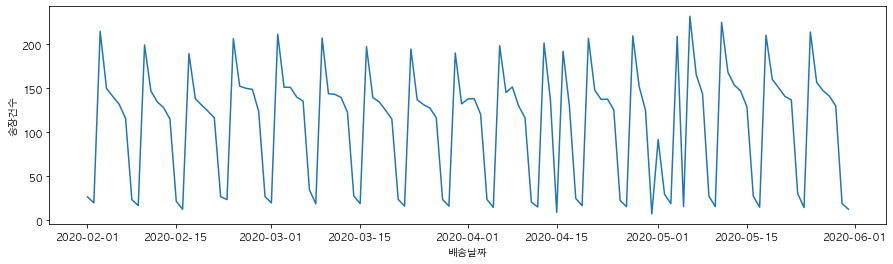

In [122]:
#서울특별시 중구 송장건수 전년대비 증감률
# j = (j20 - j19)/j19 * 100
# j

plt.figure(figsize=(15,4))
sns.lineplot(x="배송날짜", y="송장건수", data=junggu2020, ci=None)
plt.show()

### 2) 노원구 송장건수 증감률 계산

In [123]:
n19 = df[(df['배송지역'] =='서울특별시노원구') & (df['배송연도'] == 2019)]['송장건수'].sum()

In [ ]:
n20 = df[(df['배송지역'] =='서울특별시노원구') & (df['배송연도'] == 2020)]['송장건수'].sum()

In [ ]:
#서울특별시 노원구 송장건수 전년대비 증감률
n = (n20 - n19)/n19 * 100
n

## 3. 중구 & 노원구 업종별 증감 변화

### 1) 중구 2019년 업종별 송장건수 

In [ ]:
j19 = df[(df['배송지역'] =='서울특별시중구') & (df['배송연도'] == 2019) & (df['배송상품대분류명'])]['배송상품대분류명'].value_counts()
j19

In [ ]:
j19.plot(kind='bar')

### 2) 중구 2020년 업종별 송장건수 

In [ ]:
j20 = df[(df['배송지역'] =='서울특별시중구') & (df['배송연도'] == 2020) & (df['배송상품대분류명'])]['배송상품대분류명'].value_counts()
j20

In [ ]:
j20.plot(kind='bar')

In [ ]:
j19 = pd.DataFrame(
index=['식품', '생활건강', '화장품/미용', '패션의류', '디지털/가전', '도서/음반', '패션잡화', '가구/인테리어',
       '스포츠/레저', '출산/육아'], columns=['2019년'])

In [ ]:
j_shipping = pd.concat([j19, j20], axis=1)
j_shipping

In [ ]:
j_shipping.columns=["2019년 중구", "2020년 중구"]

In [ ]:
j_shipping

In [ ]:
j_shipping.plot(kind='barh')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

### 3-3) 노원구 2019년 & 2020년 업종별 송장건수 비교

In [ ]:
n19 = df[(df['배송지역']=='서울특별시노원구') & (df['배송연도'] == 2019) & (df['배송상품대분류명'])]['배송상품대분류명'].value_counts()
n19

In [ ]:
n20 = df[(df['배송지역'] =='서울특별시노원구') & (df['배송연도'] == 2020) & (df['배송상품대분류명'])]['배송상품대분류명'].value_counts()
n20

In [ ]:
n_shipping = pd.concat([n19, n20], axis=1)
n_shipping.columns=["2019년 노원구", "2020년 노원구"]
n_shipping

In [ ]:
n_shipping.plot(kind='barh')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

In [ ]:
seoul_shipping = pd.concat([j_shipping, n_shipping], axis=1)

In [ ]:
seoul_shipping

In [ ]:
seoul_shipping = seoul_shipping[['2019년 중구', '2019년 노원구','2020년 중구', '2020년 노원구']]
seoul_shipping

In [ ]:
seoul_shipping.info()

# 4. 서울 & 대구 송장건수 현황 비교

### 1-1) 서울 현황

In [ ]:
df_seoul['송장건수'].plot(color='#ff0000')
plt.grid()
plt.title("서울 송장건수 현황")
plt.xlabel("배송날짜")
plt.ylabel("송장건수")
plt.show()

### 1-2) 대구 현황

In [ ]:
df_daegu['송장건수'].plot(color='lime')
plt.grid()
plt.title("대구 송장건수 현황")
plt.xlabel("배송날짜")
plt.ylabel("송장건수")
plt.show()

In [ ]:
df

In [ ]:
df_2 = df[['배송날짜','배송연도','배송상품대분류명','배송지역','송장건수', '시도명']]
df_2

In [ ]:
df_2 = df_2.set_index("배송날짜")

In [ ]:
df_2

### 서울지역 '생활건강' 관련 배송건수 변화

In [ ]:
health_s2019 = df_2[(df_2['시도명'] == '서울특별시') &(df_2['배송상품대분류명'] =='생활건강') & (df_2['배송연도'] == 2019)]
health_s2019.plot()

In [ ]:
health_s2020 = df_2[(df_2['시도명'] == '서울특별시') &(df_2['배송상품대분류명'] =='생활건강') & (df_2['배송연도'] == 2020)]
health_s2020.plot()

In [ ]:
x = health_s2019['송장건수']
y = health_s2020['송장건수']
x.hist()
y.hist()
plt.show()

### 대구지역 '생활건강' 관련 배송건수 변화

In [ ]:
health_d2019 = df_2[(df_2['시도명'] == '대구광역시') &(df_2['배송상품대분류명'] =='생활건강') & (df_2['배송연도'] == 2019)]
health_d2019.plot(color= 'green')

In [ ]:
health_d2020 = df_2[(df_2['배송연도'] == 2020)& (df_2['시도명'] == '대구광역시') &(df_2['배송상품대분류명'] =='생활건강')]
health_d2020.plot(color= 'green')

#### ➤ 확실히 2020년이 '생활건강' 관련된 송장건수가 전반적으로 상승했으며, 신천지발 코로나 증가(2월 18일) 직후 관련 건수 급상승을 기록했다.

### 2020년 배송날짜에 따른 대구지역 '식품' 송장건수 추이

In [ ]:
new = df[['배송날짜','배송연도','배송상품대분류명','배송지역','송장건수', '시도명']]
food_daegu20 = new[(new['배송연도'] == 2020) & (new['시도명'] == '대구광역시') &(new['배송상품대분류명'] =='식품')]
food_daegu20.head()

In [ ]:
# 배송날짜에 따른 송장건수 변화추이 
food_daegu20 = food_daegu20[['배송날짜','송장건수']]

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=food_daegu20, x='배송날짜', y='송장건수')

### 2020년 배송날짜에 따른 서울지역 '생활건강' 송장건수 추이

In [ ]:
new = df[['배송날짜','배송연도','배송상품대분류명','배송지역','송장건수', '시도명']]
new_seoul20 = new[(new['배송연도'] == 2020) & (new['시도명'] == '서울특별시') &(new['배송상품대분류명'] =='생활건강')]
new_seoul20.head()

In [ ]:
# 배송날짜에 따른 송장건수 변화추이 
ns20 = new_seoul20[['배송날짜','송장건수']]

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ns20, x='배송날짜', y='송장건수')

## 업종별 송장건수 증감률 계산
'생활건강', '식품'군 